## Network Test Notebook

The goal of this notebook is to check the implementation of the
functions in **unet.py**, **metrics.py** and **visualization.py**


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from skimage.io import imread
import matplotlib.pyplot as plt

from network.unet import UNet, get_network_prediction
from utils.metrics import calculate_confusion_matrix, calculate_overall_accuracy,calculate_lane_f1_score
from tests import vis_test




### Testing U-Net. 
In case you get errors here, you may have to test each module i.e., double_conv,
encoder, decoder and output_module seperately.
Make a new  cell and reuse the same test template formate. You may also have to use test_inputs of the appropriate shape (ref figure in pdf) and intialize the module as per their init functions.

Functions TO DO :

- [ ] Step 3a: Class double_conv  ➜ \_\_init\_\_ , forward
- [ ] Step 3b: Class encoder  ➜ \_\_init\_\_ , forward
- [ ] Step 3c: Class decoder  ➜ \_\_init\_\_ , forward
- [ ] Step 3d: Class output_module  ➜ \_\_init\_\_ , forward
- [ ] Step 3e: Class UNet  ➜  \_\_init\_\_ , forward


In [3]:
# Initialize the network directly (i.e. without using model.py). 
# Recall: You have already seen something like this in the PyTorch tutorial notebook.

network = UNet()

# Create a test input tensor in the format N x C x H x W with some random values
test_input = torch.rand((1,3,256,256))

# Apply input to network. This way you can test any syntax errors in your network implementation.
network_output = network(test_input)

# Test the network output shape. From the figure in the exercise pdf document, 
# we are expecting a shape [N x 2 x 256 x 256]. Above, we used N = 1

print(network_output.shape)


torch.Size([1, 2, 256, 256])


### Testing get_network_prdiction function

Function TO DO :

- [ ] Step 3f: get_network_prediction



In [4]:

predicted_labels, lane_probability = get_network_prediction(network_output)

# we are expecting a shape [N x 256 x 256]. Above, we used N = 1
print(lane_probability.shape)


# we are expecting a shape [N x 256 x 256]. Above, we used N = 1
print(predicted_labels.shape)





torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


### Testing metrics. 


Function TO DO :

- [ ] Step 4a: calculate_confusion_matrix
- [ ] Step 4b: calculate_overall_accuracy
- [ ] Step 4c: calculate_lane_f1_score
- [ ] Step 4d: calculate_metrics  (will be tested in the train notebook)

Here we will create a dummy true-label tensor and predicted label tensor, and check if the 
metrics are calculated correctly. 


True Tensor

| <!-- -->| <!-- -->| <!-- -->|
|---|---|---|
| 1 | 0 | 0 |
| 1 | 1 | 1 |
| 1 | 1 | 1 |


Predicted Tensor

| <!-- -->| <!-- -->| <!-- -->|
|---|---|---|
| 1 | 0 | 1 |
| 0 | 0 | 1 |
| 1 | 1 | 1 |


Expected Confusion Matrix

| <!-- -->| <!-- -->|
|---|---|
| 5 | 2 | 
| 1 | 1 |


In [5]:
# Create some tensors for testing

predicted_labels = torch.ones((1,3,3))
labels = torch.ones((1,3,3))


# Create false positive samples
labels[0,0,2] = 0


# Create true negative samples
predicted_labels[0,0,1] = 0
labels[0,0,1] = 0


# Create false negative samples
predicted_labels[0,1,0] = 0
predicted_labels[0,1,1] = 0

In [6]:
# Testing calculate_confusion_matrix()


# Calculate and print confusion matrix from your implementation
conf_matrix = calculate_confusion_matrix(labels,predicted_labels)
print("Your Confusion Matrix \n{}".format(conf_matrix))



Your Confusion Matrix 
tensor([[5, 2],
        [1, 1]])


In [7]:
# Calculate accuracy and F1 score from your implementation
print('accuracy', calculate_overall_accuracy(conf_matrix)) # Expected result 0.6667
print('f1-score', calculate_lane_f1_score(conf_matrix)) # Expected result 0.7692

accuracy tensor(0.6667)
f1-score tensor(0.7692)


### Testing Overlay visualization function 


In the cell below, when you want to see the expected output as a reference, set the variable Test to False.


To test your implementation, set **test = True** 

Function TO DO :

- [ ] Step 5a: get_overlay_image



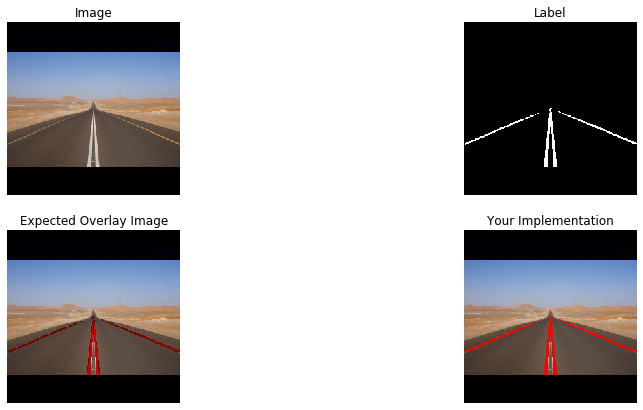

In [8]:
test = True
vis_test.test_overlay(test)
